In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
from math import *
import operator
import time
pd.options.mode.chained_assignment = None
import math
import os
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
import seaborn as sns
import xgboost as xgb
import datetime
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [6]:
data.columns = train.columns[1:]

In [4]:
import pandas as pd
data = pd.read_csv('./covtype.data',header=None)


In [7]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [34]:
useful_feats_to_plot = ['Elevation', 'Horizontal_Distance_To_Hydrology',
                           'Cover_Type']

In [35]:
points_to_show  = 1000 #Downsample for plotting purposes


In [36]:
df_to_plot = train.ix[:points_to_show, useful_feats_to_plot]


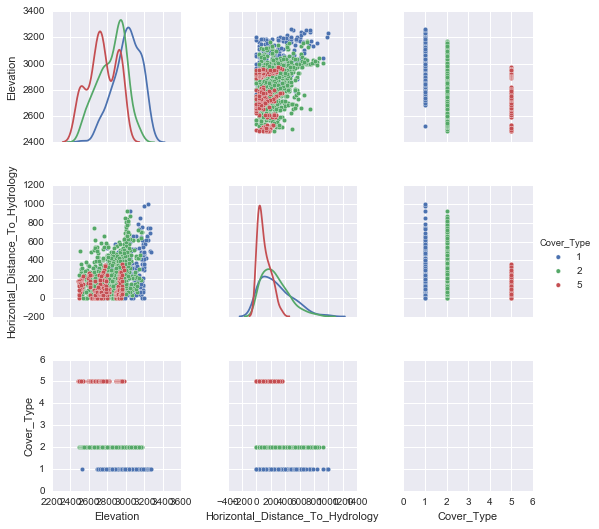

In [37]:
sns.pairplot(df_to_plot, hue="Cover_Type", diag_kind="kde")


In [8]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [13]:
data.columns = train.columns[1:] 

In [14]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [15]:
# remove constant columns
remove = []
for col in data.columns:
    if data[col].std() == 0:
        remove.append(col)

data.drop(remove, axis=1, inplace=True)
data.drop(remove, axis=1, inplace=True)


In [16]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [17]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [21]:
predictors = train.columns[1:-1]

In [23]:
predictors

Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points', u'Wilderness_Area1',
       u'Wilderness_Area2', u'Wilderness_Area3', u'Wilderness_Area4',
       u'Soil_Type1', u'Soil_Type2', u'Soil_Type3', u'Soil_Type4',
       u'Soil_Type5', u'Soil_Type6', u'Soil_Type7', u'Soil_Type8',
       u'Soil_Type9', u'Soil_Type10', u'Soil_Type11', u'Soil_Type12',
       u'Soil_Type13', u'Soil_Type14', u'Soil_Type15', u'Soil_Type16',
       u'Soil_Type17', u'Soil_Type18', u'Soil_Type19', u'Soil_Type20',
       u'Soil_Type21', u'Soil_Type22', u'Soil_Type23', u'Soil_Type24',
       u'Soil_Type25', u'Soil_Type26', u'Soil_Type27', u'Soil_Type28',
       u'Soil_Type29', u'Soil_Type30', u'Soil_Type31', u'Soil_Type32',
       u'Soil_Type33', u'Soil_Type34', u'Soil_Type35', u'Soil_Type36',
       u'Soil_

In [25]:
X_train = train[predictors]
y_train = train[train.columns[-1]]

In [26]:
y_train.shape

(15120,)

In [27]:
X_train.shape

(15120, 54)

In [28]:
clf1 = RandomForestClassifier()

In [30]:
cross_val_score(clf1, X_train, y_train).mean()

0.74146825396825389

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn import svm

In [33]:
clf2 = svm.SVC()

In [34]:
cross_val_score(clf2, X_train, y_train).mean()

0.14589947089947089

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier()

In [38]:
cross_val_score(knn, X_train, y_train).mean()

0.67123015873015868

In [42]:
train.corrwith(y_train)

Id                                    0.108363
Elevation                             0.016090
Aspect                                0.008015
Slope                                 0.087722
Horizontal_Distance_To_Hydrology     -0.010515
Vertical_Distance_To_Hydrology        0.075647
Horizontal_Distance_To_Roadways      -0.105662
Hillshade_9am                        -0.010286
Hillshade_Noon                       -0.098905
Hillshade_3pm                        -0.053399
Horizontal_Distance_To_Fire_Points   -0.089389
Wilderness_Area1                     -0.230117
Wilderness_Area2                      0.014994
Wilderness_Area3                      0.122146
Wilderness_Area4                      0.075774
Soil_Type1                            0.015069
Soil_Type2                            0.022627
Soil_Type3                           -0.016393
Soil_Type4                           -0.027816
Soil_Type5                            0.027692
Soil_Type6                            0.006521
Soil_Type7   

In [43]:
clf4 = xgb.XGBClassifier(missing=np.nan, max_depth=7, n_estimators=350, learning_rate=0.03, nthread=4, subsample=0.95, colsample_bytree=0.85, seed=4242)


In [45]:
cross_val_score(clf4, X_train.as_matrix(), y_train).mean()

0.76977513227513228

In [46]:
from sklearn import tree

In [47]:
clf5 = tree.DecisionTreeClassifier()

In [48]:
cross_val_score(clf5, X_train, y_train).mean()

0.69312169312169303

In [49]:
cl5 = tree.DecisionTreeClassifier(max_depth=4, random_state=1234)

In [51]:
cross_val_score(clf5, X_train, y_train,cv=10).mean()

0.71236772486772504

In [52]:
import seaborn as sns

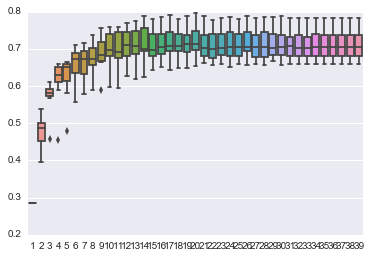

In [57]:
depth, scores = list(range(1, 40, 1)), []
for i in depth:
    clf = tree.DecisionTreeClassifier(max_depth=i, random_state=1234)
    x = cross_val_score(clf, X_train, y_train,
                               cv=10)
    scores.append(x)
x = [i for i in depth for j in range(10)]
sns.boxplot(x, np.array(scores).flatten())

In [98]:
clf4 = xgb.XGBClassifier(missing=np.nan, max_depth=7, n_estimators=350, learning_rate=0.03, nthread=4, subsample=0.95, colsample_bytree=0.85, seed=4242)



In [99]:
clf4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=350, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.95)

In [64]:
df = pd.DataFrame(clf.feature_importances_.tolist())

In [67]:
df = df.T

In [69]:
df.columns = predictors

In [106]:

result = clf4.predict(test[predictors])

In [107]:
len(result)

565892

In [77]:
sample_sub = pd.read_csv("./sampleSubmission.csv")

In [108]:
result2 = pd.DataFrame(result)

In [109]:
sub = pd.concat((test["Id"],result2),axis=1)

In [110]:
sub.columns = sample_sub.columns

In [111]:
sub.to_csv("my_submisson.csv",index=False)

In [112]:
sub.head()

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,1
3,15124,1
4,15125,1


In [94]:
sample_sub.head()

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1


In [96]:
my_sub = pd.read_csv("./my_submisson.csv")

In [97]:
my_sub.head()

,Id,Cover_Type
0,15121,2
1,15122,5
2,15123,2
3,15124,2
4,15125,2


In [114]:
from sklearn import decomposition

In [115]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [116]:
pca = decomposition.PCA()


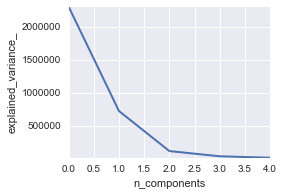

In [121]:
# Plot the PCA spectrum
pca.fit(X_train)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_[0:5], linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [119]:
pca.explained_variance_.shape

(54,)

In [9]:
from sklearn import preprocessing

In [123]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

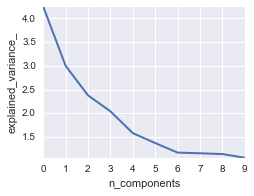

In [125]:
# Plot the PCA spectrum
pca.fit(X_train_scaled)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_[0:10], linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [126]:
X_test = test[predictors]

In [127]:
X_test_scaled = preprocessing.scale(X_test)

In [128]:
clf4.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=350, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.95)

In [129]:
result = clf4.predict(X_test_scaled)
result2 = pd.DataFrame(result)
sub = pd.concat((test["Id"],result2),axis=1)
sub.columns = sample_sub.columns

sub.to_csv("my_submisson.csv",index=False)

In [156]:
def clean_df(df_train):
    # remove constant columns
    remove = []
    for col in df.columns:
        if df[col].std() == 0:
            remove.append(col)

    
    
    # remove duplicated columns
    remove = []
    c = df.columns
    for i in range(len(c)-1):
        v = df[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,df[c[j]].values):
            remove.append(c[j])

   


In [145]:
clean_df(X_train)

In [161]:
X_test = test[X_train.columns]

In [150]:
cross_val_score(clf4, X_train, y_train)

array([ 0.78650794,  0.75039683,  0.77301587])

In [153]:
def sub_to_kaggle(clf, X_test):
    result = clf.predict(X_test)
    result2 = pd.DataFrame(result)
    sub = pd.concat((test["Id"],result2),axis=1)
    sub.columns = sample_sub.columns
    sub_file = os.path.join('submission_' + str(datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")) + '.csv')
    sub.to_csv(sub_file,index=False)
    print "Good Luck!"

In [154]:
clf4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=350, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.95)

In [162]:
sub_to_kaggle(clf4, X_test)

Good Luck!


In [165]:
X_train.columns

Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points', u'Wilderness_Area1',
       u'Wilderness_Area2', u'Wilderness_Area3', u'Wilderness_Area4',
       u'Soil_Type1', u'Soil_Type2', u'Soil_Type3', u'Soil_Type4',
       u'Soil_Type5', u'Soil_Type6', u'Soil_Type8', u'Soil_Type9',
       u'Soil_Type10', u'Soil_Type11', u'Soil_Type12', u'Soil_Type13',
       u'Soil_Type14', u'Soil_Type16', u'Soil_Type17', u'Soil_Type18',
       u'Soil_Type19', u'Soil_Type20', u'Soil_Type21', u'Soil_Type22',
       u'Soil_Type23', u'Soil_Type24', u'Soil_Type25', u'Soil_Type26',
       u'Soil_Type27', u'Soil_Type28', u'Soil_Type29', u'Soil_Type30',
       u'Soil_Type31', u'Soil_Type32', u'Soil_Type33', u'Soil_Type34',
       u'Soil_Type35', u'Soil_Type36', u'Soil_Type37', u'Soil_Type38',
       u'Soil

In [168]:
train.columns.difference(X_train.columns)

Index([u'Cover_Type', u'Id', u'Soil_Type15', u'Soil_Type7'], dtype='object')

In [169]:
from sklearn.preprocessing import LabelEncoder


In [170]:
le = LabelEncoder()

In [171]:
y = le.fit_transform(y_train.values)

In [173]:
cross_val_score(clf4, X_train, y, cv= 10).mean()

0.76395502645502644

In [174]:
clf4.fit(X_train, y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=350, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.95)

In [175]:
y_pred = clf4.predict_proba(X_test)

In [177]:
pred_labels = le.inverse_transform(np.argsort(y_pred, axis=1)[:,::-1][:,:1])

In [178]:
pred_labels

array([[2],
       [2],
       [1],
       ..., 
       [3],
       [3],
       [3]])

In [179]:
    result2 = pd.DataFrame(pred_labels)
    sub = pd.concat((test["Id"],result2),axis=1)
    sub.columns = sample_sub.columns
    sub_file = os.path.join('submission_' + str(datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")) + '.csv')
    sub.to_csv(sub_file,index=False)
    print "Good Luck!"

Good Luck!


In [181]:
y_train = [x -1 for x in y_train]   

In [182]:
clf4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=350, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.95)

In [184]:
y_pred = clf4.predict(X_test) + 1

In [186]:
    result2 = pd.DataFrame(y_pred)
    sub = pd.concat((test["Id"],result2),axis=1)
    sub.columns = sample_sub.columns
    sub_file = os.path.join('submission_' + str(datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")) + '.csv')
    sub.to_csv(sub_file,index=False)
    print "Good Luck!"

Good Luck!


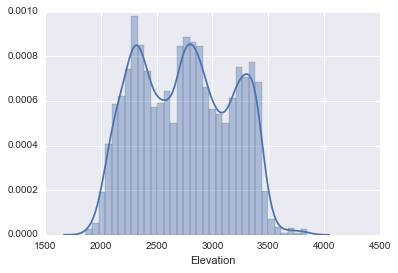

In [188]:
sns.distplot(train["Elevation"])

In [189]:
from sklearn import mixture

In [190]:
g = mixture.GMM(n_components=3)

In [192]:
obs = np.concatenate((np.random.randn(100, 1),
...                       10 + np.random.randn(300, 1)))

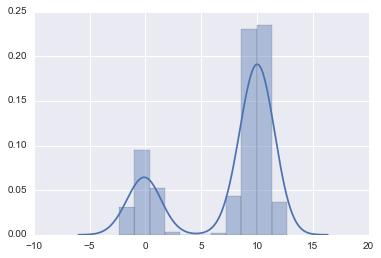

In [217]:
sns.distplot(obs)

In [199]:
obs.shape

(400, 1)

In [204]:
data_e = train["Elevation"].reshape(15120,1)

In [213]:
Y = g.fit_predict(data_e )

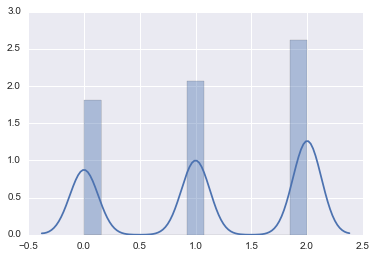

In [216]:
sns.distplot(Y)

In [218]:
train.columns

Index([u'Id', u'Elevation', u'Aspect', u'Slope',
       u'Horizontal_Distance_To_Hydrology', u'Vertical_Distance_To_Hydrology',
       u'Horizontal_Distance_To_Roadways', u'Hillshade_9am', u'Hillshade_Noon',
       u'Hillshade_3pm', u'Horizontal_Distance_To_Fire_Points',
       u'Wilderness_Area1', u'Wilderness_Area2', u'Wilderness_Area3',
       u'Wilderness_Area4', u'Soil_Type1', u'Soil_Type2', u'Soil_Type3',
       u'Soil_Type4', u'Soil_Type5', u'Soil_Type6', u'Soil_Type7',
       u'Soil_Type8', u'Soil_Type9', u'Soil_Type10', u'Soil_Type11',
       u'Soil_Type12', u'Soil_Type13', u'Soil_Type14', u'Soil_Type15',
       u'Soil_Type16', u'Soil_Type17', u'Soil_Type18', u'Soil_Type19',
       u'Soil_Type20', u'Soil_Type21', u'Soil_Type22', u'Soil_Type23',
       u'Soil_Type24', u'Soil_Type25', u'Soil_Type26', u'Soil_Type27',
       u'Soil_Type28', u'Soil_Type29', u'Soil_Type30', u'Soil_Type31',
       u'Soil_Type32', u'Soil_Type33', u'Soil_Type34', u'Soil_Type35',
       u'Soil_Type36', 

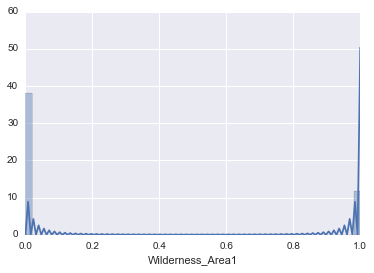

In [222]:
sns.distplot(train["Wilderness_Area1"])

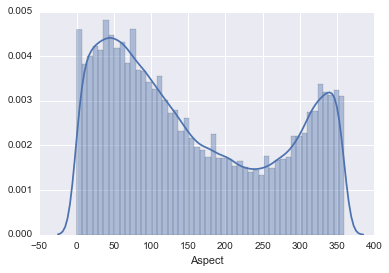

In [220]:
sns.distplot(test["Aspect"])

In [223]:
import mixture

ImportError: No module named mixture

In [225]:
from sklearn.mixture import GMM

np.random.seed(1)

gmm = GMM(3, n_iter=1)
gmm.means_ = np.array([[-1], [0], [3]])
gmm.covars_ = np.array([[1.5], [1], [0.5]]) ** 2
gmm.weights_ = np.array([0.3, 0.5, 0.2])

X = gmm.sample(1000)

In [226]:
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GMM(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

ValueError: GMM expects at least 2 samples provided in a 2 dimensional array-like input

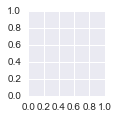

In [229]:
M_best

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

(array([ 0.00291348,  0.00291348,  0.00291348,  0.00874043,  0.0116539 ,
         0.00582695,  0.03204824,  0.02330781,  0.04078867,  0.06700995,
         0.05535605,  0.122366  ,  0.19228942,  0.18646247,  0.22142418,
         0.30008804,  0.25347242,  0.26512632,  0.18646247,  0.13110642,
         0.11362557,  0.06700995,  0.07866385,  0.12819295,  0.13984685,
         0.11071209,  0.08157733,  0.06409647,  0.01456738,  0.00291348]),
 array([-5.58064657, -5.23741396, -4.89418135, -4.55094874, -4.20771613,
        -3.86448352, -3.52125091, -3.1780183 , -2.83478569, -2.49155308,
        -2.14832048, -1.80508787, -1.46185526, -1.11862265, -0.77539004,
        -0.43215743, -0.08892482,  0.25430779,  0.5975404 ,  0.94077301,
         1.28400562,  1.62723823,  1.97047084,  2.31370345,  2.65693606,
         3.00016867,  3.34340128,  3.68663389,  4.0298665 ,  4.37309911,
         4.71633172]),
 <a list of 1 Patch objects>)

In [10]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess


In [11]:

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)


In [12]:
#----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()



In [17]:

# Instanciate a Gaussian Process model
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1e-1,
                     random_start=100)


In [18]:
x = np.atleast_2d(np.linspace(0, 10, 1000)).T


In [20]:
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

In [21]:
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)


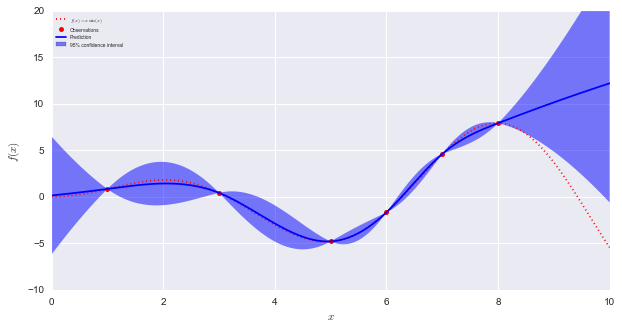

In [43]:
fig = plt.figure(figsize=(10,5))
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
params = {'legend.fontsize': 5}
plt.rcParams.update(params)

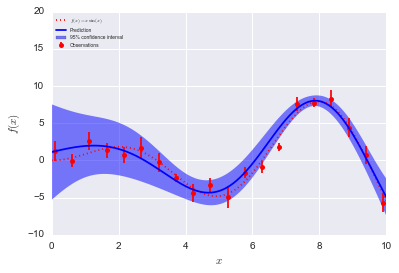

In [46]:

#----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
gp = GaussianProcess(corr='squared_exponential', theta0=1e-1,
                     thetaL=1e-3, thetaU=1,
                     nugget=(dy / y) ** 2,
                     random_start=100)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, MSE = gp.predict(x, eval_MSE=True)
sigma = np.sqrt(MSE)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

In [47]:
from scipy import stats
from matplotlib import cm

In [48]:
# Standard normal distribution functions
phi = stats.distributions.norm().pdf
PHI = stats.distributions.norm().cdf
PHIinv = stats.distributions.norm().ppf


In [49]:
# A few constants
lim = 8


def g(x):
    """The function to predict (classification will then consist in predicting
    whether g(x) <= 0 or not)"""
    return 5. - x[:, 1] - .5 * x[:, 0] ** 2.

In [52]:
# Design of experiments
X = np.array([[-4.61611719, -6.00099547],
              [4.10469096, 5.32782448],
              [0.00000000, -0.50000000],
              [-6.17289014, -4.6984743],
              [1.3109306, -6.93271427],
              [-5.03823144, 3.10584743],
              [-2.87600388, 6.74310541],
              [5.21301203, 4.26386883]])

# Observations
y = g(X)
# Instanciate and fit Gaussian Process Model
gp = GaussianProcess(theta0=5e-1)

# Don't perform MLE or you'll get a perfect prediction for this simple example!
gp.fit(X, y)



GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x114d56758>, normalize=True,
        nugget=array(2.220446049250313e-15), optimizer='fmin_cobyla',
        random_start=1,
        random_state=<mtrand.RandomState object at 0x108d79c50>,
        regr=<function constant at 0x114d56410>, storage_mode='full',
        theta0=array([[ 0.5]]), thetaL=None, thetaU=None, verbose=False)

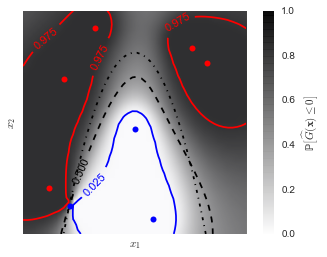

In [56]:
# Evaluate real function, the prediction and its MSE on a grid
res = 50
x1, x2 = np.meshgrid(np.linspace(- lim, lim, res),
                     np.linspace(- lim, lim, res))
xx = np.vstack([x1.reshape(x1.size), x2.reshape(x2.size)]).T

y_true = g(xx)
y_pred, MSE = gp.predict(xx, eval_MSE=True)
sigma = np.sqrt(MSE)
y_true = y_true.reshape((res, res))
y_pred = y_pred.reshape((res, res))
sigma = sigma.reshape((res, res))
k = PHIinv(.975)

# Plot the probabilistic classification iso-values using the Gaussian property
# of the prediction
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.axes.set_aspect('equal')
plt.xticks([])
plt.yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

cax = plt.imshow(np.flipud(PHI(- y_pred / sigma)), cmap=cm.gray_r, alpha=0.8,
                extent=(- lim, lim, - lim, lim))
norm = plt.matplotlib.colors.Normalize(vmin=0., vmax=0.9)
cb = plt.colorbar(cax, ticks=[0., 0.2, 0.4, 0.6, 0.8, 1.], norm=norm)
cb.set_label('${\\rm \mathbb{P}}\left[\widehat{G}(\mathbf{x}) \leq 0\\right]$')

plt.plot(X[y <= 0, 0], X[y <= 0, 1], 'r.', markersize=12)

plt.plot(X[y > 0, 0], X[y > 0, 1], 'b.', markersize=12)

cs = plt.contour(x1, x2, y_true, [0.], colors='k', linestyles='dashdot')

cs = plt.contour(x1, x2, PHI(- y_pred / sigma), [0.025], colors='b',
                linestyles='solid')
plt.clabel(cs, fontsize=11)

cs = plt.contour(x1, x2, PHI(- y_pred / sigma), [0.5], colors='k',
                linestyles='dashed')
plt.clabel(cs, fontsize=11)

cs = plt.contour(x1, x2, PHI(- y_pred / sigma), [0.975], colors='r',
                linestyles='solid')
plt.clabel(cs, fontsize=11)

plt.show()


In [57]:
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [59]:
svc = SVC(kernel="linear")

In [60]:
cross_val_score(svc, X_train.as_matrix(), y_train).mean()

NameError: name 'X_train' is not defined